<a href="https://colab.research.google.com/github/vijaygwu/MathematicsOfML/blob/main/L1L2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

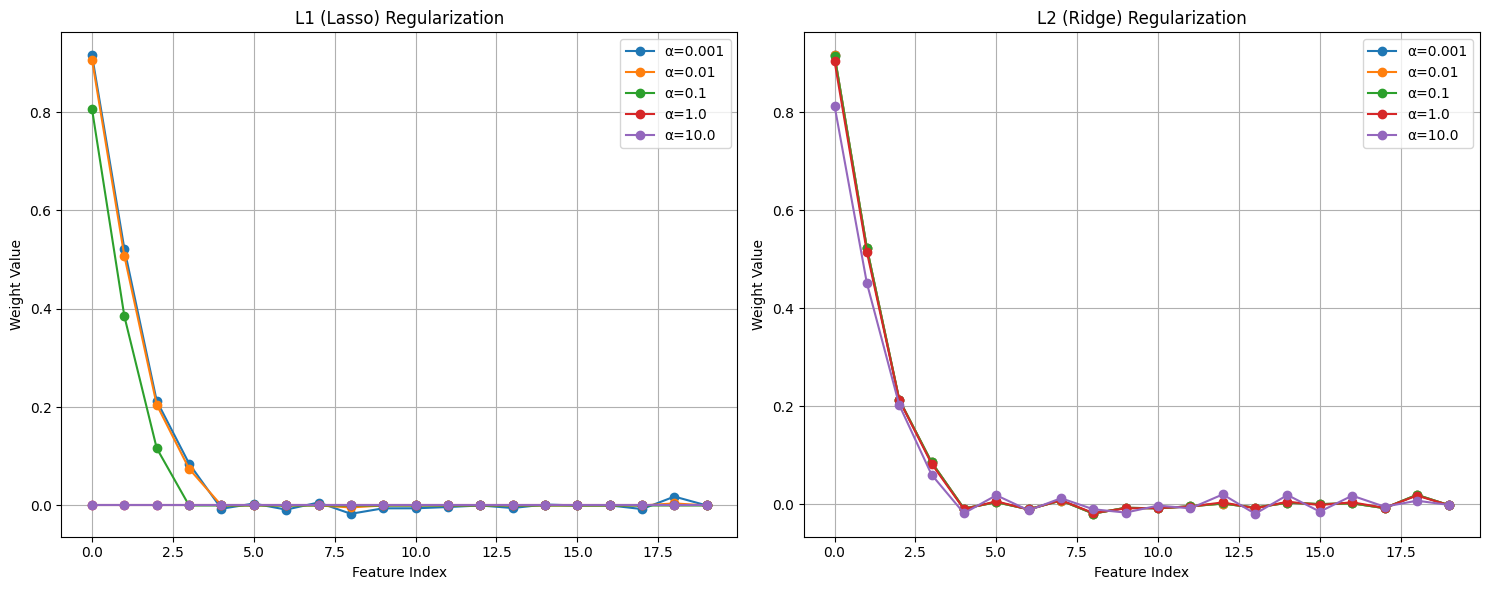


Feature Importance Comparison (α=0.1):
Feature  |  L1 Weight  |  L2 Weight
----------------------------------------
   0    |     0.806   |     0.915
   1    |     0.385   |     0.522
   2    |     0.116   |     0.214
   3    |     0.000   |     0.086
   4    |    -0.000   |    -0.009


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso, Ridge
from sklearn.preprocessing import StandardScaler

# Generate sample data
np.random.seed(42)
X = np.random.randn(100, 20)
true_weights = np.array([1, 0.5, 0.2, 0.1] + [0] * 16)  # Only first 4 features are relevant
y = X @ true_weights + np.random.randn(100) * 0.1

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Function to train and compare L1 and L2 models
def compare_regularization(X, y, alphas):
    l1_weights = []
    l2_weights = []

    for alpha in alphas:
        # L1 (Lasso) Regularization
        lasso = Lasso(alpha=alpha)
        lasso.fit(X, y)
        l1_weights.append(lasso.coef_)

        # L2 (Ridge) Regularization
        ridge = Ridge(alpha=alpha)
        ridge.fit(X, y)
        l2_weights.append(ridge.coef_)

    return np.array(l1_weights), np.array(l2_weights)

# Train models with different regularization strengths
alphas = [0.001, 0.01, 0.1, 1.0, 10.0]
l1_weights, l2_weights = compare_regularization(X_scaled, y, alphas)

# Plotting
plt.figure(figsize=(15, 6))

# Plot L1 (Lasso) weights
plt.subplot(1, 2, 1)
for i, alpha in enumerate(alphas):
    plt.plot(l1_weights[i], label=f'α={alpha}', marker='o')
plt.title('L1 (Lasso) Regularization')
plt.xlabel('Feature Index')
plt.ylabel('Weight Value')
plt.legend()
plt.grid(True)

# Plot L2 (Ridge) weights
plt.subplot(1, 2, 2)
for i, alpha in enumerate(alphas):
    plt.plot(l2_weights[i], label=f'α={alpha}', marker='o')
plt.title('L2 (Ridge) Regularization')
plt.xlabel('Feature Index')
plt.ylabel('Weight Value')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Print feature importance comparison
def print_feature_importance(l1_model, l2_model, alpha):
    print(f"\nFeature Importance Comparison (α={alpha}):")
    print("Feature  |  L1 Weight  |  L2 Weight")
    print("-" * 40)
    for i in range(5):  # Show first 5 features
        print(f"   {i}    |    {l1_model[i]:6.3f}   |    {l2_model[i]:6.3f}")

print_feature_importance(l1_weights[2], l2_weights[2], alphas[2])